Test Notebook to analyze the used car database from kaggle

In [50]:
#Import
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
dfused=pd.read_csv("C:/data/autos.csv")
#print(df1.head)
dfused.head(5)



,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [52]:
counts = dfused.groupby('vehicleType').size(); counts

vehicleType
andere         3357
bus           30201
cabrio        22898
coupe         19015
kleinwagen    80023
kombi         67564
limousine     95894
suv           14707
dtype: int64

In [53]:
df_sub = dfused[['name', 'price','vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
            'fuelType', 'brand']]

In [95]:
df_sub.describe()

,price,yearOfRegistration,powerPS,kilometer
count,3.715280e+05,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228
std,3.587954e+06,92.866598,192.139578,40112.337051
min,0.000000e+00,1000.000000,0.000000,5000.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000


In [96]:
df_sub['price'].groupby(df_sub['fuelType']).describe()

fuelType       
andere    count    2.080000e+02
          mean     1.032767e+07
          std      1.489010e+08
          min      0.000000e+00
          25%      1.500000e+02
          50%      9.990000e+02
          75%      2.999000e+03
          max      2.147484e+09
benzin    count    2.238570e+05
          mean     8.883581e+03
          std      5.668308e+05
          min      0.000000e+00
          25%      9.500000e+02
          50%      2.200000e+03
          75%      5.700000e+03
          max      1.000000e+08
cng       count    5.710000e+02
          mean     4.669140e+03
          std      3.801311e+03
          min      0.000000e+00
          25%      1.990000e+03
          50%      3.750000e+03
          75%      6.400000e+03
          max      2.885600e+04
diesel    count    1.077460e+05
          mean     1.171236e+04
          std      5.342471e+05
          min      0.000000e+00
          25%      2.850000e+03
          50%      5.900000e+03
          75%      1.150

In [94]:
df_sub['price'].groupby(['powerPS', 'fuelType']).mean()

KeyError: 'powerPS'

In [74]:
#print(dfused.groupby('yearOfRegistration').size())
work_df = df_sub[(df_sub.yearOfRegistration == 2015)  & 
                (df_sub.model == 'golf') & (df_sub.vehicleType == 'limousine')]  
print(work_df.groupby('fuelType').size())

fuelType
benzin    140
diesel     79
hybrid      1
dtype: int64


In [56]:
work_df
# We no longer need vehicle type or year
work_df = work_df[['name', 'price', 'gearbox', 'powerPS', 'kilometer', 'fuelType']]
work_df.head(5)

,name,price,gearbox,powerPS,kilometer,fuelType
2096,Volkswagen_Golf_1.6_TDI_BlueMotion_Technology_...,22750,automatik,110,40000,diesel
3525,"Volkswagen_Golf_GTI_Performance_DSG""NAVI""KEYLE...",27300,automatik,230,20000,benzin
4250,Golf_7_CUP_EDITION__1.2_TSI_110_PS,16999,manuell,110,20000,benzin
6216,Volkswagen_Golf_1.6_TDI_BlueMotion_Technology_DSG,21000,automatik,110,20000,diesel
7157,Volkswagen_Golf_GTD_BlueMotion_Technology_DSG,31900,automatik,184,30000,diesel
9814,Volkswagen_Golf_1.2_TSI_BlueMotion_Technology_...,14900,manuell,86,10000,benzin
11307,Volkswagen_Golf_GTI_Performance_BlueMotion_Tec...,33900,automatik,230,20000,benzin
14822,Volkswagen_Golf_2.0_TDI_BlueMotion_Technology_...,19990,manuell,150,20000,diesel
16157,Volkswagen_Golf_R_4Motion_BlueMotion_Technolog...,37500,automatik,300,20000,benzin
16221,Volkswagen_Golf_1.4_TSI_BlueMotion_Technology_...,16990,manuell,125,20000,benzin


In [84]:
work_df.groupby(['powerPS', 'fuelType']).mean()

,,price,yearOfRegistration,kilometer
powerPS,fuelType,,,
86,benzin,15135.176471,2015.0,13676.470588


In [57]:
# is the name column meaningul?
print(work_df.groupby('name').size())


name
Biete_Ihnen_einen_VW_Golf_7_GTI_zur_Finanzierungs_�bernahme_an       1
GOLF_7_R_Line_Xenon_LED_Navi_Leder                                   1
GOLF_7_R_Line_Xenon_LED_Navi_Leder_DSG                               1
GOLF_GTI__DSG_LEDER_KAMERA_NAVI_KEYLESS_USW                          1
GOLF_TSI_BlueMotion__Sondermodell_LOUNGE__mit_AHK__1a_Zustand!!!!    1
Golf_7_1.2L_110PS_TSI_BMT_Comfortl.__Navi__Kessy__GRA_Massagesitz    1
Golf_7_CUP_EDITION__1.2_TSI_110_PS                                   1
Golf_7_Comfortline_"Lounge"___kein_Rueckrufmodell                    1
Golf_7_GTD_ab_Mai_zu_verkaufen...                                    1
Golf_7_GTE_Hybrid_Golf                                               1
Golf_7_GTI_DSG                                                       1
Golf_7_R_zur_Leasinguebernahme                                       1
Golf_7_Trendline_STANDHEIZUNG                                        1
Golf_7_VII_GTD_DSG                                                   1
G

In [58]:
print pd.crosstab([work_df.powerPS, work_df.gearbox], work_df.fuelType,  margins=True)

fuelType           benzin  diesel  hybrid  All
powerPS gearbox                               
85      manuell         1       0       0    1
86      manuell        34       0       0   34
105     automatik       0       2       0    2
        manuell         3       0       0    3
110     automatik       3       6       0    9
        manuell        25      14       0   39
125     automatik       6       0       0    6
        manuell        14       0       0   14
140     automatik       1       0       0    1
150     automatik       5       8       0   13
        manuell         3      16       0   19
184     automatik       0      18       0   18
        manuell         0      14       0   14
185     automatik       0       1       0    1
204     automatik       0       0       1    1
220     automatik      10       0       0   10
        manuell         9       0       0    9
230     automatik      12       0       0   12
        manuell         2       0       0    2
300     autom

In [59]:
print pd.crosstab([work_df.powerPS, work_df.gearbox], work_df.price.mean(), margins=True)

col_0              22412.0045249  All
powerPS gearbox                      
85      manuell                1    1
86      manuell               34   34
105     automatik              3    3
        manuell                3    3
110     automatik              9    9
        manuell               39   39
125     automatik              6    6
        manuell               14   14
140     automatik              1    1
150     automatik             13   13
        manuell               19   19
184     automatik             18   18
        manuell               14   14
185     automatik              1    1
204     automatik              1    1
220     automatik             10   10
        manuell                9    9
230     automatik             12   12
        manuell                2    2
300     automatik             11   11
        manuell                1    1
All                          221  221


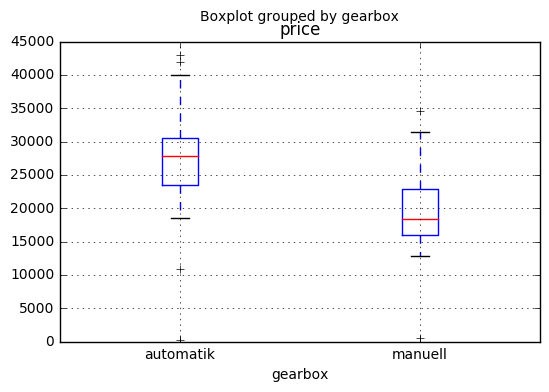

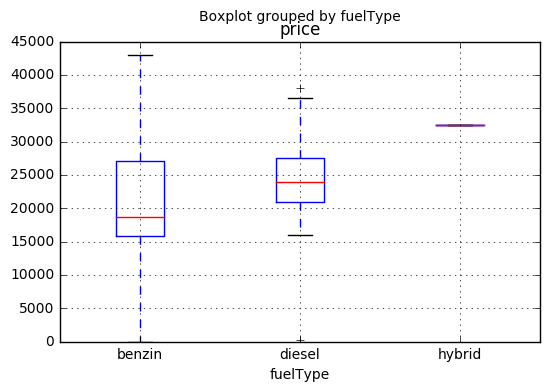

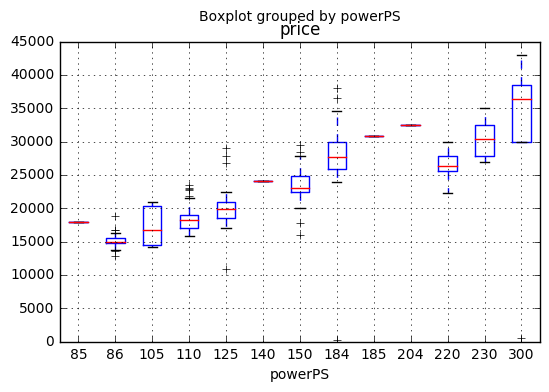

In [60]:
%matplotlib inline
bp = work_df.boxplot(column = 'price', by='gearbox')
ba = work_df.boxplot(column = 'price', by='fuelType')
ba = work_df.boxplot(column = 'price', by='powerPS')

In [83]:
work_df.groupby(['powerPS', 'fuelType']).mean()

,,price,yearOfRegistration,kilometer
powerPS,fuelType,,,
86,benzin,15135.176471,2015.0,13676.470588


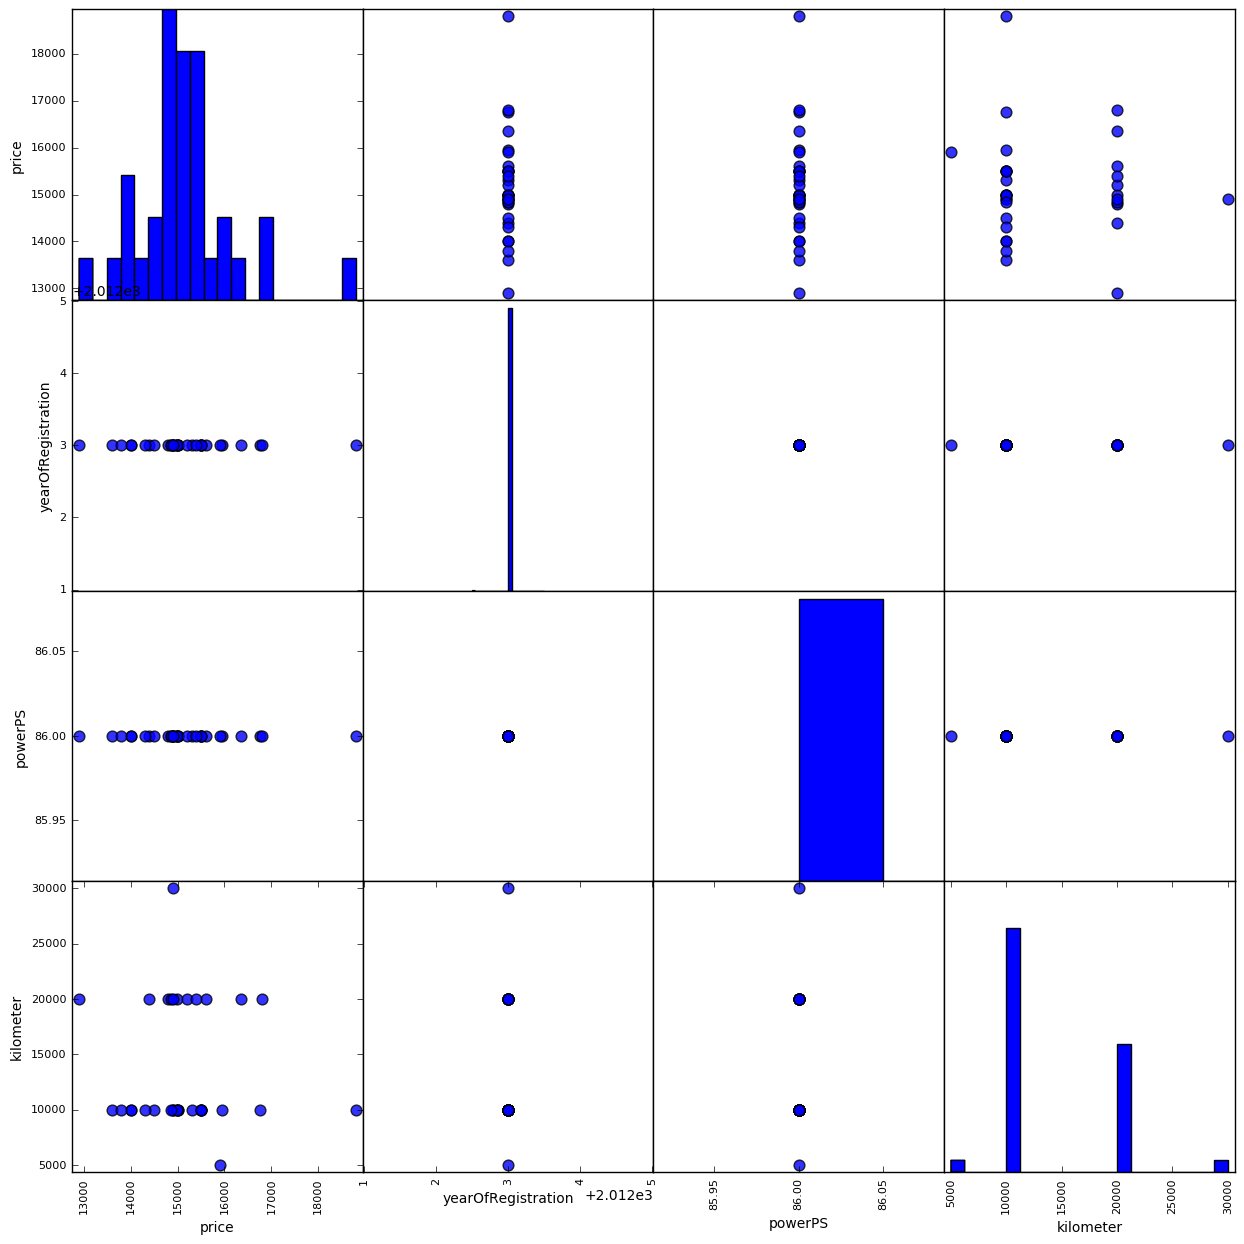

In [80]:

plot_data =pd.DataFrame(work_df)
grr = pd.scatter_matrix(work_df, figsize=(15,15), marker ='o',
                       hist_kwds={'bins': 20}, s=60, alpha=.8)

In [78]:
#Let's now get rid of some of the other variable
# look only at manual gas cars
work_df.head(5)
work_df = work_df[(work_df.fuelType == 'benzin') & (work_df.gearbox == 'manuell') & (work_df.powerPS == 86) ] 
             

work_df.describe()

#what does the data look like now
#plot_data =pd.DataFrame(work_df)
#grr = pd.scatter_matrix(work_df, figsize=(15,15), marker ='o',
#                       hist_kwds={'bins': 5}, s=60, alpha=.8)

,price,yearOfRegistration,powerPS,kilometer
count,34.000000,34.0,34.0,34.000000
mean,15135.176471,2015.0,86.0,13676.470588
std,1049.807095,0.0,0.0,5682.085555
min,12900.000000,2015.0,86.0,5000.000000
25%,14805.000000,2015.0,86.0,10000.000000
50%,14990.000000,2015.0,86.0,10000.000000
75%,15499.750000,2015.0,86.0,20000.000000
max,18800.000000,2015.0,86.0,30000.000000


In [39]:
work_df.describe()


,price,powerPS,kilometer
count,221.000000,221.000000,221.000000
mean,22412.004525,152.199095,17963.800905
std,6883.413321,57.910717,7944.040192
min,0.000000,85.000000,5000.000000
25%,16999.000000,110.000000,10000.000000
50%,21999.000000,150.000000,20000.000000
75%,27450.000000,184.000000,20000.000000
max,42999.000000,300.000000,50000.000000


In [8]:
#Let's get a subset of the data so the analysis is more meaningful
work_df = dfused[(dfused.yearOfRegistration == 2015) & 
                (dfused.model == 'golf') & (dfused.vehicleType == 'limousine')]  
print(work_df.groupby('model').size())
#print(work_df.groupby('name').size())
print(work_df.groupby('yearOfRegistration').size())
print(work_df.groupby('vehicleType').size())
print pd.crosstab([work_df.yearOfRegistration, work_df.gearbox], work_df.fuelType,  margins=True)

model
golf    221
dtype: int64
yearOfRegistration
2015    221
dtype: int64
vehicleType
limousine    221
dtype: int64
fuelType                      benzin  diesel  hybrid  All
yearOfRegistration gearbox                               
2015               automatik      48      35       1   84
                   manuell        92      44       0  136
All                              140      79       1  220


In [10]:
work15_df = dfused[(dfused.yearOfRegistration == 2015) & 
                (dfused.model == 'golf') & (dfused.vehicleType == 'limousine')]

print(work15_df.groupby('price').size())
work15_df.describe().transpose()
#Let's see if there is any relationship between attributes by analysing
#work_df.plot.scatter(x='price', y='yearOfRegistration', c='c', s=50)
#work_df.plot.hist(stacked=True, bins=20, columns=['price'])

price
0        1
275      1
487      1
10900    1
12900    1
13600    1
13790    1
14000    2
14190    1
14290    1
14299    1
14400    1
14500    1
14790    1
14800    1
14850    2
14900    4
14990    3
14999    1
15000    1
15200    1
15300    1
15400    1
15499    2
15500    2
15600    1
15800    1
15900    1
15950    3
15999    1
        ..
28899    1
28900    1
28990    2
29200    1
29500    1
29900    3
29998    1
30000    2
30400    1
30500    1
30800    2
30900    1
31000    1
31500    1
31900    2
32500    1
32900    1
33900    2
34499    1
34500    1
34950    1
35990    1
36500    1
36900    1
37500    1
37900    1
37990    1
40000    1
41999    1
42999    1
dtype: int64


,count,mean,std,min,25%,50%,75%,max
price,221.0,22412.004525,6883.413321,0.0,16999.0,21999.0,27450.0,42999.0
yearOfRegistration,221.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
powerPS,221.0,152.199095,57.910717,85.0,110.0,150.0,184.0,300.0
kilometer,221.0,17963.800905,7944.040192,5000.0,10000.0,20000.0,20000.0,50000.0
monthOfRegistration,221.0,3.714932,2.707767,0.0,2.0,3.0,5.0,12.0
nrOfPictures,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
postalCode,221.0,41819.755656,17096.366118,7973.0,31840.0,38440.0,40699.0,96465.0


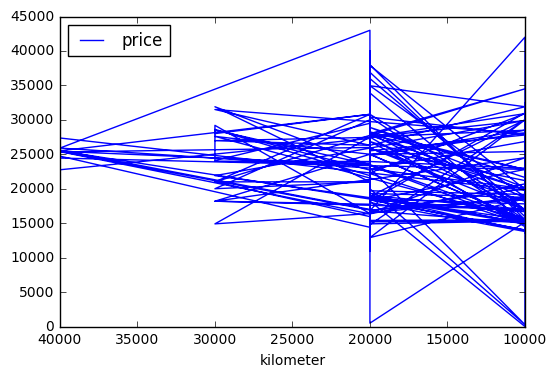

In [13]:

%matplotlib inline
work15_df.plot(x='kilometer', y='price')


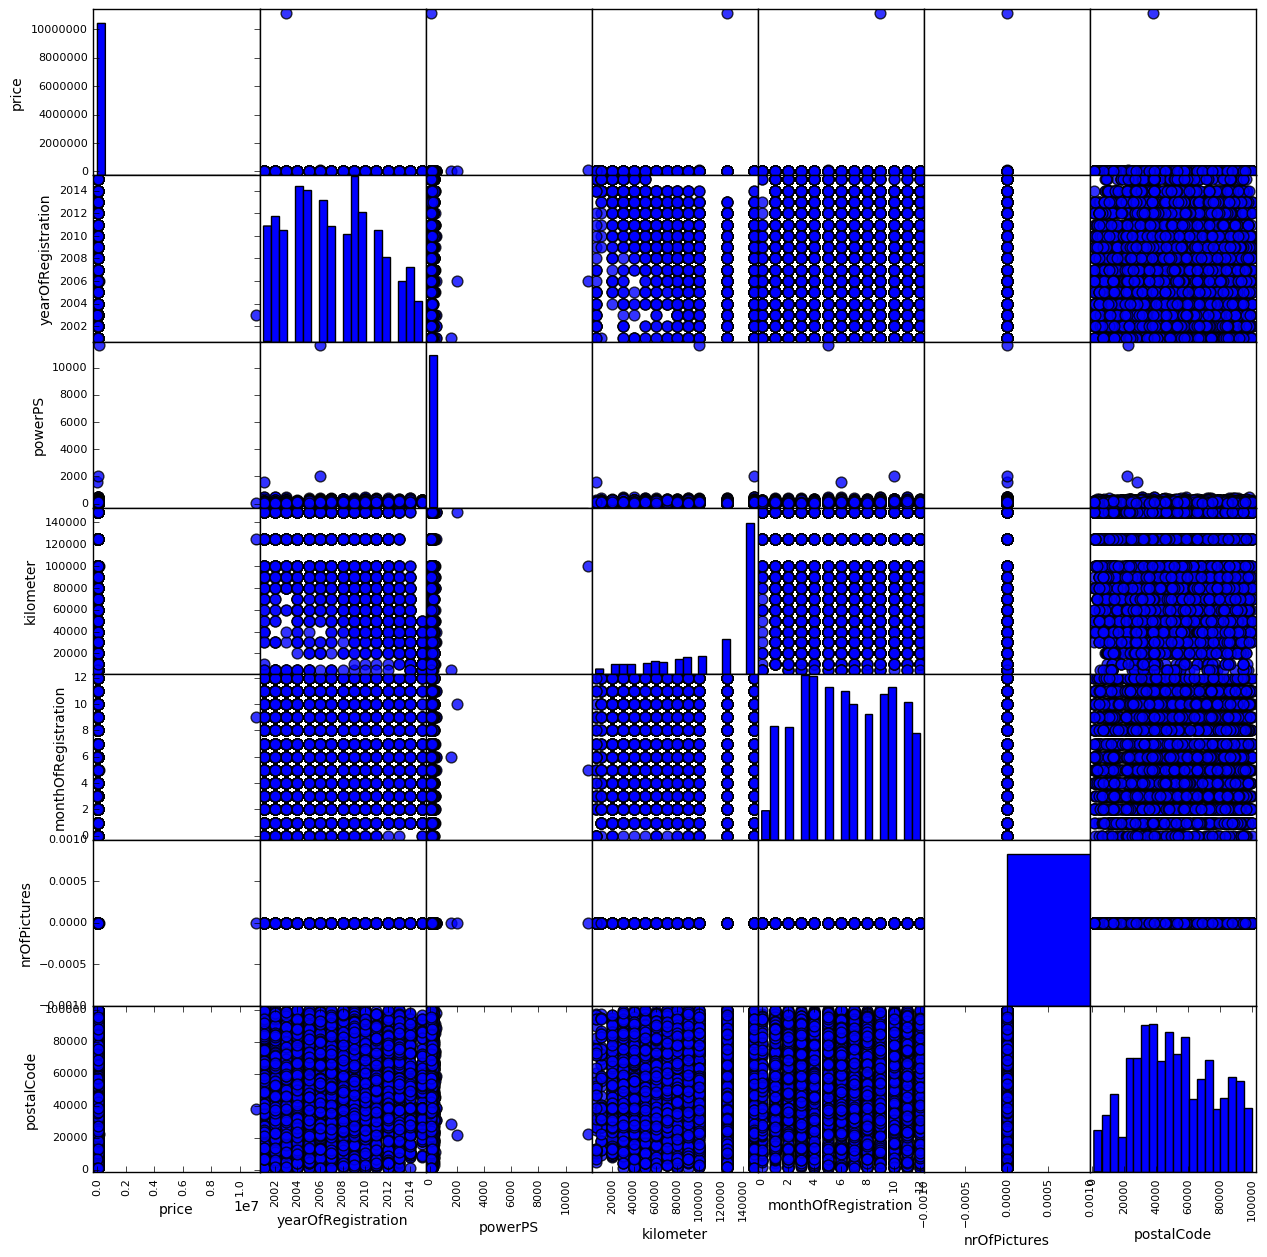

In [37]:
%matplotlib inline
plot_data =pd.DataFrame(work_df)
grr = pd.scatter_matrix(work_df, figsize=(15,15), marker ='o',
                       hist_kwds={'bins': 20}, s=60, alpha=.8)

In [6]:
print(dfused.groupby('model').size())

model
100              417
145               50
147              572
156              629
159              212
1_reihe         1306
1er             3837
200               18
2_reihe         4816
300c             148
3_reihe         3503
3er            20567
4_reihe          640
500              927
5_reihe          451
5er             8546
601              419
6_reihe         1291
6er              258
7er             1143
80              1606
850              212
90               104
900              117
9000              31
911              954
a1               622
a2               373
a3              6604
a4             10257
               ...  
toledo           343
touareg          745
touran          3540
transit          764
transporter     5528
tt              1325
tucson           239
twingo          4953
up               348
v40              782
v50              255
v60               48
v70              645
v_klasse         168
vectra          4255
verso            312
viano  

In [4]:
dfused.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
dfused.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
d